# 01 - Exploratory Data Analysis (EDA) - Online Retail II

En este notebook se realiza la exploración inicial del dataset **Online Retail II**:
- Revisión de estructura y tipos de datos.
- Análisis de nulos.
- Detección de valores atípicos (cantidades negativas, precios cero).
- Vista general por país y periodo.

Este análisis justifica las decisiones de limpieza que se aplicarán después.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# Ruta relativa al proyecto
path = "../data/raw/online_retail_II.csv"

df = pd.read_csv(path)

# Normalizar los nombres de columnas
df.columns = ["Invoice","StockCode","Description","Quantity",
              "InvoiceDate","Price","CustomerID","Country"]

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   CustomerID   824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Vemos:
- Nº de filas y columnas.
- Tipos de datos por columna.
- Presencia de nulos (especialmente en `CustomerID` y `Description`).
- `InvoiceDate` está como tipo `object` y se debe convertir a `datetime`.


In [7]:
df.isnull().mean().sort_values(ascending=False)


CustomerID     0.227669
Description    0.004105
StockCode      0.000000
Invoice        0.000000
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Country        0.000000
dtype: float64

`CustomerID` presenta un porcentaje importante de valores nulos.
Para segmentar clientes es imprescindible tener un identificador,
por lo que se eliminarán las filas sin `CustomerID`.


In [8]:
df[["Quantity","Price"]].describe()


,Quantity,Price
count,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00
std,1.727058e+02,1.235531e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


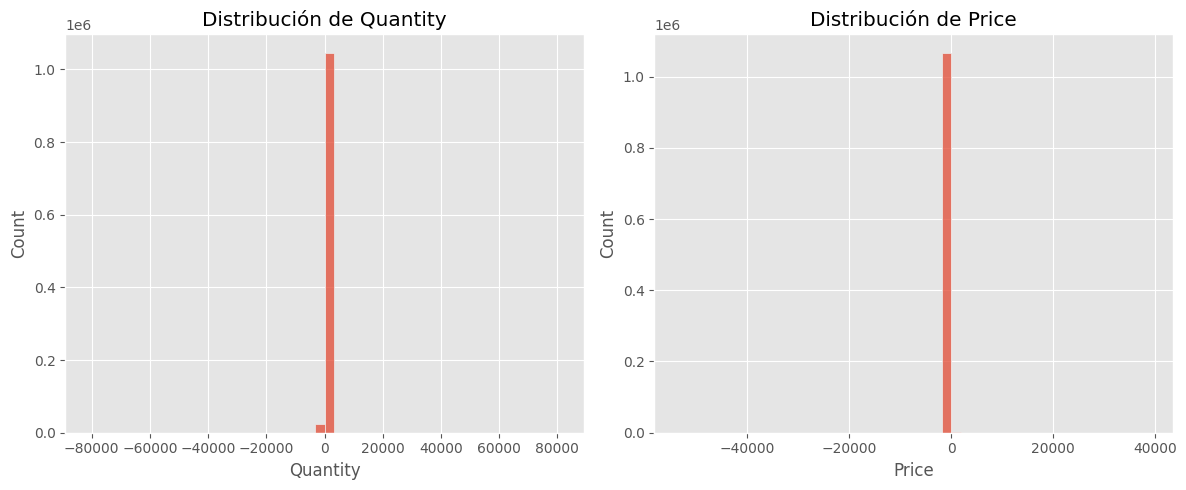

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df["Quantity"], bins=50, ax=axes[0])
axes[0].set_title("Distribución de Quantity")

sns.histplot(df["Price"], bins=50, ax=axes[1])
axes[1].set_title("Distribución de Price")

plt.tight_layout()
plt.show()


In [10]:
(df["Quantity"] <= 0).mean(), (df["Price"] <= 0).mean()


(np.float64(0.021501427338760374), np.float64(0.005815222635803296))

Hay un porcentaje de `Quantity <= 0` (devoluciones) y `Price <= 0`.
Para el análisis de comportamiento de compra y segmentación,
nos interesa el comportamiento de compras positivas,
por lo que se filtrarán cantidades y precios mayores a 0.


In [11]:
df["Country"].value_counts().head(10)


Country
United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Spain               3811
Switzerland         3189
Belgium             3123
Portugal            2620
Australia           1913
Name: count, dtype: int64

El país dominante es **United Kingdom**, junto con otros países europeos.
Esto es consistente con la documentación del dataset.
La segmentación se hará a nivel global, pero se puede usar `country` como variable descriptiva.
